<a href="https://colab.research.google.com/github/nirezuluet/ML-from-scratch-/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [23]:
def euclidean_distance(x,y):
  return math.sqrt(np.sum((x-y)**2))

In [27]:
class KMean:

  def __init__(self, k, num_iter):

    self.k = k
    self.num_iter = num_iter

    self.clusters = [[] for _ in range(self.k)]
    self.centroids = [None for _ in range(self.k)]


  def predict(self, X):

    #getting the dimensions of X

    n_samples, n_features = X.shape

    #selecting randomly k data points from X
    indexes = np.random.choice(range(n_samples),self.k, replace = False)
    self.centroids = [X[index] for index in indexes]

    for _ in range(self.num_iter):

      #create the clusters for centroids
      self.clusters = self.get_clusters(X, self.centroids)

      #get the new centroids from the already formed clusters
      new_centroids = self.get_centroids(self.clusters, X)

      old_centroids = self.centroids
      self.centroids = new_centroids

      #inspect if the previous centroids and the new_centroids are identicals
      if self.identical_centroids(old_centroids, self.centroids):
        break

    labels = self.get_labels(X, self.clusters)
    return labels



  def get_clusters(self, X, centroids):

    clusters = [[] for _ in centroids]

    for i in range(X.shape[0]): #iterating the rows of X

      distances = [euclidean_distance(X[i], centroid) for centroid in centroids]

      #getting the index of the closest centroid for the data point
      index = np.argsort(distances)[0]

      #adding the element to the corresponding cluster
      clusters[index].append(i)

    return clusters

  def get_centroids(self, clusters, X):

    # updating the centroids by taking the mean for each cluster
    new_centroids = [None for _ in range(self.k)]

    for cluster_idx, cluster in enumerate(clusters):

      #get the mean values of the cluster
      mean_ = np.mean(X[cluster], axis = 0)
      new_centroids[cluster_idx] = mean_

    return new_centroids


  def identical_centroids(self, old_centroids, new_centroids):

    # compute the distance of each element of old_centroids to new_centroids
    distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(len(old_centroids))]

    return np.sum(distances) == 0 #meaning that all the points in both lists are identical

  def get_labels(self, X, clusters):
    # associate to each row in X the index of the corresponding cluster
    labels = np.zeros(X.shape[0])

    for idx_cluster, cluster in enumerate(clusters):
      labels[cluster] = idx_cluster

    return labels


  def plot(self, X):
    fig, ax = plt.subplots(figsize = (12, 8))

    for i, index in enumerate(self.clusters):
      point = X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color = "black", linewidth=2)
    plt.show()



In [21]:
#testing
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 3, n_samples=500, n_features=2, shuffle=True, random_state=40)

print(X.shape)
clusters = len(np.unique(y))
print(clusters)

(500, 2)
3


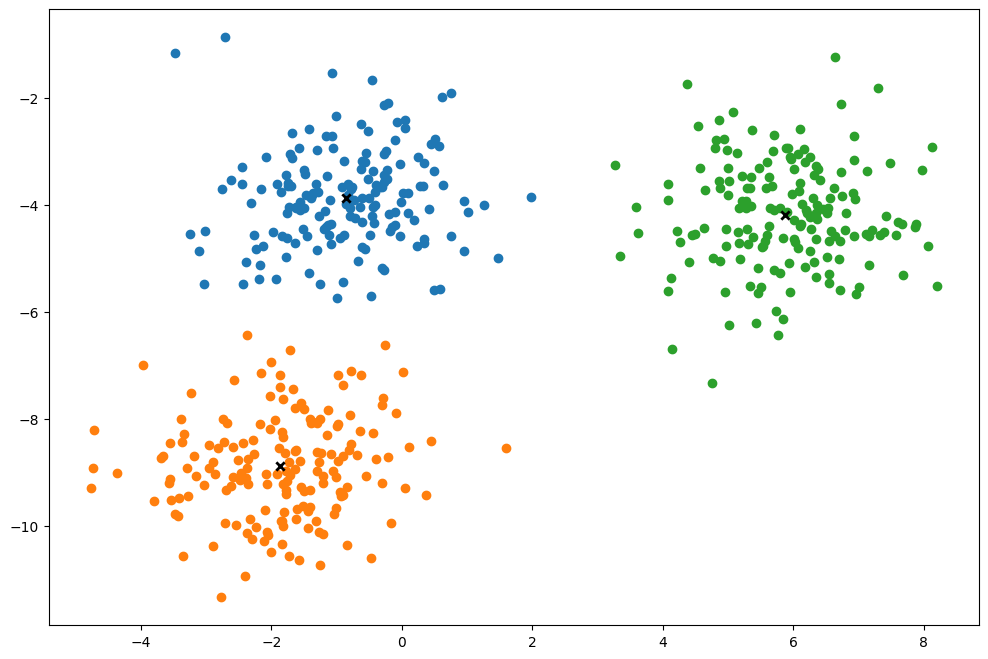

In [30]:
k = KMean(k=clusters,num_iter=100)
y_pred = k.predict(X)
k.plot(X)